<a href="https://colab.research.google.com/github/fanrz/Cancer_MMSegmentation/blob/main/Cancer_MMSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a opemmmlab segmentation implemtation.
Dataset is from a open-source cancer image.

## Install MMSegmentation
This step may take several minutes. 

We use PyTorch 1.5.0 and CUDA 10.1 for this tutorial. You may install other versions by change the version number in pip install command. 

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# Install PyTorch
!pip install -U torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 703.8 MB 22 kB/s 
     |████████████████████████████████| 6.6 MB 47.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.5.0+cu101 which is incompatible.


In [ ]:
# Install MMCV
# !pip install mmcv-full==latest+torch1.5.0+cu101 -f https://download.openmmlab.com/mmcv/dist/index.html
!pip install mmcv-full==1.3.8 -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.5.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.5.0/index.html
     |████████████████████████████████| 30.3 MB 86 kB/s 
     |████████████████████████████████| 185 kB 12.9 MB/s 


In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 3915, done.
remote: Counting objects: 100% (663/663), done.
remote: Compressing objects: 100% (507/507), done.
remote: Total 3915 (delta 278), reused 376 (delta 151), pack-reused 3252
Receiving objects: 100% (3915/3915), 6.05 MiB | 8.72 MiB/s, done.
Resolving deltas: 100% (2652/2652), done.
/content/mmsegmentation
Obtaining file:///content/mmsegmentation
  Running setup.py develop for mmsegmentation


In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.5.0+cu101 True
0.16.0


## Run Inference with MMSeg trained weight

In [ ]:
!mkdir checkpoints
# !wget https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints

--2021-08-29 20:49:12--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.225
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/octet-stream]
Saving to: ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  10.1MB/s    in 20s     

2021-08-29 20:49:35 (9.54 MB/s) - ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’ saved [196205945/196205945]



In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [ ]:
config_file = 'configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
checkpoint_file = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

In [ ]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

Use load_from_local loader


In [ ]:
# test a single image
img = 'demo/demo.png'
result = inference_segmentor(model, img)

/content/mmsegmentation/mmseg/models/segmentors/base.py:257: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


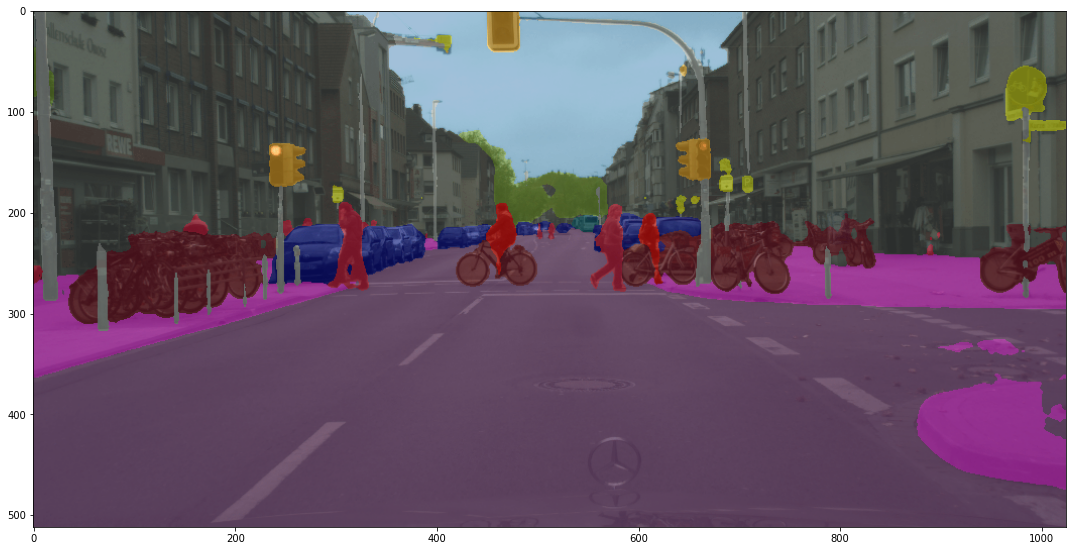

In [ ]:
# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes'))

## Train a semantic segmentation model on a new dataset

To train on a customized dataset, the following steps are neccessary. 
1. Add a new dataset class. 
2. Create a config file accordingly. 
3. Perform training and evaluation. 

### Add a new dataset

Datasets in MMSegmentation require image and semantic segmentation maps to be placed in folders with the same perfix. To support a new dataset, we may need to modify the original file structure. 

In this tutorial, we give an example of converting the dataset. You may refer to [docs](https://github.com/open-mmlab/mmsegmentation/docs/tutorials/new_dataset.md) for details about dataset reorganization. 

We use [Standord Background Dataset](http://dags.stanford.edu/projects/scenedataset.html) as an example. The dataset contains 715 images chosen from existing public datasets [LabelMe](http://labelme.csail.mit.edu), [MSRC](http://research.microsoft.com/en-us/projects/objectclassrecognition), [PASCAL VOC](http://pascallin.ecs.soton.ac.uk/challenges/VOC) and [Geometric Context](http://www.cs.illinois.edu/homes/dhoiem/). Images from these datasets are mainly outdoor scenes, each containing approximately 320-by-240 pixels. 
In this tutorial, we use the region annotations as labels. There are 8 classes in total, i.e. sky, tree, road, grass, water, building, mountain, and foreground object. 

In [ ]:
# download and unzip
# !wget http://dags.stanford.edu/data/iccv09Data.tar.gz -O standford_background.tar.gz
# !tar xf standford_background.tar.gz

In [ ]:
!wget https://comp-private-prod.obs.cn-east-3.myhuaweicloud.com/dataset/2021/seed2021/yiliaoweisheng/train.zip -O train.zip  

--2021-08-29 22:55:00--  https://comp-private-prod.obs.cn-east-3.myhuaweicloud.com/dataset/2021/seed2021/yiliaoweisheng/train.zip
Resolving comp-private-prod.obs.cn-east-3.myhuaweicloud.com (comp-private-prod.obs.cn-east-3.myhuaweicloud.com)... 121.36.239.130, 121.36.239.135, 121.36.239.140
Connecting to comp-private-prod.obs.cn-east-3.myhuaweicloud.com (comp-private-prod.obs.cn-east-3.myhuaweicloud.com)|121.36.239.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7473905579 (7.0G) [application/zip]
Saving to: ‘train.zip’

train.zip            49%[========>           ]   3.44G   542KB/s    in 7m 59s  

2021-08-29 23:03:01 (7.36 MB/s) - Connection closed at byte 3697958912. Retrying.

--2021-08-29 23:03:02--  (try: 2)  https://comp-private-prod.obs.cn-east-3.myhuaweicloud.com/dataset/2021/seed2021/yiliaoweisheng/train.zip
Connecting to comp-private-prod.obs.cn-east-3.myhuaweicloud.com (comp-private-prod.obs.cn-east-3.myhuaweicloud.com)|121.36.239.130|:443... 

In [ ]:
!cd
!ls

017NYbuU.png  CrkH3fw2.png  kpgb4GFj.png	     SLnIY9w2.png
01jKDwRi.png  crXL8T9j.png  KPHAcbeS.png	     SME18jqF.png
02jv7G1P.png  csxlApJ3.png  KpZVEkFG.png	     sMeTg3YU.png
04qwufUH.png  ctL9p0BJ.png  KqIJ4xkZ.png	     SOaUDPNV.png
0659eHoR.png  Cu8oJEdt.png  kqMOI5xH.png	     sOWPIiU1.png
068DhJIU.png  CUO6fLBc.png  KqOrYDS3.png	     SoXEnlOy.png
0aGT6gN7.png  cUx5J2o0.png  kraJIVEq.png	     sPcC8UO2.png
0AYnV4h6.png  CWLwXeS0.png  krfoDBWL.png	     Spr6yC3U.png
0CL1XkY5.png  cwPpODfM.png  KRH62TXW.png	     sQA4Ofh6.png
0DqBXloK.png  CxeO631a.png  KSfzDPrV.png	     sqDwr1jc.png
0dS6DMeF.png  cYAvhfVW.png  ksWnB2F6.png	     sqFuGPrg.png
0FE4nOMu.png  CzkpKjAR.png  KTahBSc0.png	     SswYWkzJ.png
0g8Skvu2.png  czXfk9WH.png  KThx1AsL.png	     ST7egzIY.png
0hFEBOXm.png  d0tmaOAr.png  KTONGqj8.png	     SterHJuC.png
0ij86vKa.png  D1bXC0ZU.png  Ku07cJIk.png	     sTg5rwmA.png
0j58IEQp.png  d1cTbjgs.png  KUAzlH09.png	     Stoj5TYb.png
0JgQuETW.png  D4zpZ2UP.png  KuJxT8Rl.png	     suMB5boL.p

In [ ]:
!ls
!cp train.zip train_1.zip
!unzip train.zip

In [ ]:
!ls -la

total 997900
drwxr-xr-x 18 root root       4096 Aug 29 21:02 .
drwxr-xr-x  1 root root       4096 Aug 29 20:49 ..
drwxr-xr-x  2 root root       4096 Aug 29 20:49 checkpoints
drwxr-xr-x 34 root root       4096 Aug 29 20:49 configs
drwxr-xr-x  2 root root       4096 Aug 29 20:49 demo
drwxr-xr-x  2 root root       4096 Aug 29 20:49 .dev
drwxr-xr-x  3 root root       4096 Aug 29 20:49 docker
drwxr-xr-x  3 root root       4096 Aug 29 20:49 docs
drwxr-xr-x  4 root root       4096 Aug 29 20:49 docs_zh-CN
drwxr-xr-x  8 root root       4096 Aug 29 20:49 .git
drwxr-xr-x  4 root root       4096 Aug 29 20:49 .github
-rw-r--r--  1 root root       1300 Aug 29 20:49 .gitignore
-rw-r--r--  1 root root      11422 Aug 29 20:49 LICENSE
-rw-r--r--  1 root root        155 Aug 29 20:49 MANIFEST.in
drwxr-xr-x 10 root root       4096 Aug 29 20:49 mmseg
drwxr-xr-x  2 root root       4096 Aug 29 20:49 mmsegmentation.egg-info
-rw-r--r--  1 root root        910 Aug 29 20:49 model-index.yml
-rw-r--r--  1 root root

In [ ]:
!cd train/train_org_image

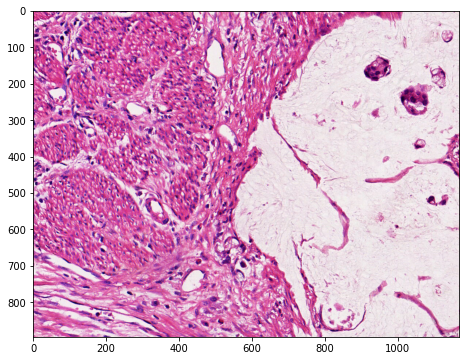

In [ ]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('train/train_org_image/0AYnV4h6.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
import os.path as osp
import numpy as np
import pandas as pd
from PIL import Image
import cv2
# convert dataset annotation to semantic segmentation map
data_root = 'train'
img_dir = 'train_org_image'
ann_dir = 'train_mask'
# define class and plaette for better visualization
classes = ('NaN_0', 'NaN_1')
palette = [[128, 128, 128], [129, 127, 38]]
image_names_list = []
labels_list = []
train_label = pd.read_csv('train/train_label.csv', sep=",")
labels = np.array(list(train_label["label"]))
image_names = np.array(list(train_label["image_name"]))
image_names_list = list(image_names)
labels_list = list(labels)
print(image_names)
print(labels)
print(image_names_list)
print(labels_list)

['DriTK8PS.png' 'DdoyknRO.png' 'mBaydeDo.png' ... 'nN2SKhx5.png'
 '9evf8WAD.png' '3iOBGoMd.png']
[1 1 1 ... 0 0 0]
['DriTK8PS.png', 'DdoyknRO.png', 'mBaydeDo.png', 'YpTZltdj.png', 'P7vDwA9b.png', 'rRLdcDHk.png', '2iYoACHu.png', 'amGWHdQD.png', 'bIg9TxiQ.png', '3JvlWjuk.png', 'EpP1TMa0.png', 'WqvLBJfC.png', 'mAPrdxnL.png', 'YP9m5ilw.png', 'GTKNuAIQ.png', 'yTb58CuB.png', '3UxVKr1O.png', 'IPvmO32Q.png', 'qf7VIz3h.png', 'Y35J90jO.png', 'AU92LQTt.png', 'Y9mTB2R0.png', 'GrREDuMn.png', 'wF18VRlm.png', 'p8oL59kb.png', 'dcCMgvz9.png', 'p3QLq0fj.png', '1i5F0oPh.png', 'Ix85QfB1.png', 'MLpojRgw.png', 'z2KoykiC.png', '9Jy8isS5.png', 'jJxRydZl.png', 'm9IeZuXN.png', '5P1Vl2jI.png', 'JgsFtnqI.png', 'g0SwfNYc.png', 'udaPv87x.png', 'hwSQomDP.png', 'RfhbnN63.png', 'W2JKimtX.png', 'C6b7qIRa.png', 'fyv6k3uR.png', 'emSqjvBn.png', 'voS0679a.png', 'kG4Hjr3E.png', '7dgvcAZ3.png', 'gqCFHAXo.png', 'jeIAEMBF.png', 'MnRomqNa.png', '9CrxHcgA.png', 'Zb2WVvCl.png', 'L8QsIl3r.png', 'WJwtpNF0.png', 'gNrl02ok.png', 'TLj

In [ ]:
num = image_names_list.index('El9CevsZ.png')
labels_list[num]

0

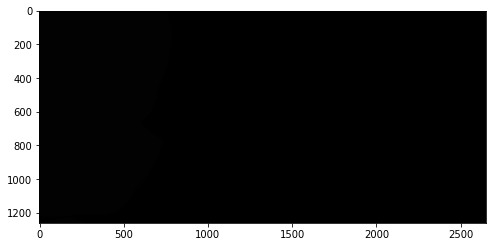

In [ ]:
img = mmcv.imread('train/train_mask/0aGT6gN7.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.png'):
  # print(file)
  # print(labels_list[image_names_list.index(file)])
  # print('train/train_mask/',file)
  mask = cv2.imread('train/train_mask/'+file,cv2.IMREAD_GRAYSCALE)
  mask[mask == 255] = labels_list[image_names_list.index(file)]
  cv2.imwrite('train/train_mask/'+file,mask)

In [ ]:
import cv2
from PIL import Image
mask = cv2.imread('train/train_mask/0aGT6gN7.png',cv2.IMREAD_GRAYSCALE)
print(mask)

[[2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 ...
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]]


We need to convert the annotation into semantic map format as an image.

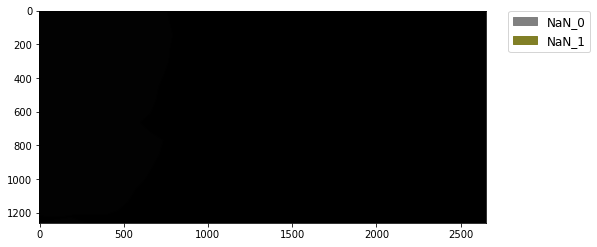

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches

label = Image.open('train/train_mask/0aGT6gN7.png')
plt.figure(figsize=(8, 6))

mask_1 = plt.imshow(np.array(label.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(2)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')
plt.show()

In [ ]:
# split train/val set randomly
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

In [ ]:
!cd train/
!ls

017NYbuU.png  CrkH3fw2.png  kpgb4GFj.png	     SLnIY9w2.png
01jKDwRi.png  crXL8T9j.png  KPHAcbeS.png	     SME18jqF.png
02jv7G1P.png  csxlApJ3.png  KpZVEkFG.png	     sMeTg3YU.png
04qwufUH.png  ctL9p0BJ.png  KqIJ4xkZ.png	     SOaUDPNV.png
0659eHoR.png  Cu8oJEdt.png  kqMOI5xH.png	     sOWPIiU1.png
068DhJIU.png  CUO6fLBc.png  KqOrYDS3.png	     SoXEnlOy.png
0aGT6gN7.png  cUx5J2o0.png  kraJIVEq.png	     sPcC8UO2.png
0AYnV4h6.png  CWLwXeS0.png  krfoDBWL.png	     Spr6yC3U.png
0CL1XkY5.png  cwPpODfM.png  KRH62TXW.png	     sQA4Ofh6.png
0DqBXloK.png  CxeO631a.png  KSfzDPrV.png	     sqDwr1jc.png
0dS6DMeF.png  cYAvhfVW.png  ksWnB2F6.png	     sqFuGPrg.png
0FE4nOMu.png  CzkpKjAR.png  KTahBSc0.png	     SswYWkzJ.png
0g8Skvu2.png  czXfk9WH.png  KThx1AsL.png	     ST7egzIY.png
0hFEBOXm.png  d0tmaOAr.png  KTONGqj8.png	     SterHJuC.png
0ij86vKa.png  D1bXC0ZU.png  Ku07cJIk.png	     sTg5rwmA.png
0j58IEQp.png  d1cTbjgs.png  KUAzlH09.png	     Stoj5TYb.png
0JgQuETW.png  D4zpZ2UP.png  KuJxT8Rl.png	     suMB5boL.p

*After* downloading the data, we need to implement `load_annotations` function in the new dataset class `StandfordBackgroundDataset`.

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class CancerDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

    

### Create a config file
In the next step, we need to modify the config for the training. To accelerate the process, we finetune the model from trained weights.

In [ ]:
from mmcv import Config
cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py')

Since the given config is used to train PSPNet on cityscapes dataset, we need to modify it accordingly for our new dataset.  

In [ ]:
from mmseg.apis import set_random_seed

# Since we use ony one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 8
cfg.model.auxiliary_head.num_classes = 8

# Modify dataset type and path
cfg.dataset_type = 'CancerDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(512, 512), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

# cfg.runner.max_iters = 300
cfg.runner.max_iters = 400
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.checkpoint_config.interval = 200

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        pool_scales=(1, 2, 3, 6),
        dropout_ratio=0.1,
        num_classes=8,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_index=2,
        channels=256,
        num_convs=1,
        concat_input=F

### Train and Evaluation

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

/usr/local/lib/python3.7/dist-packages/mmcv/utils/misc.py:324: UserWarning: "flip_ratio" is deprecated in `RandomFlip.__init__`, please use "prob" instead
  f'"{src_arg_name}" is deprecated in '
2021-08-29 23:35:56,553 - mmseg - INFO - Loaded 1416 images
/content/mmsegmentation/mmseg/models/backbones/resnet.py:428: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
2021-08-29 23:35:57,337 - mmseg - INFO - Loaded 354 images
2021-08-29 23:35:57,338 - mmseg - INFO - load checkpoint from checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
2021-08-29 23:35:57,343 - mmseg - INFO - Use load_from_local loader
2021-08-29 23:36:02,952 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 354/354, 4.4 task/s, elapsed: 81s, ETA:     0s

2021-08-29 23:42:06,379 - mmseg - INFO - per class results:
2021-08-29 23:42:06,381 - mmseg - INFO - 
+-------+-------+-------+
| Class |  IoU  |  Acc  |
+-------+-------+-------+
| NaN_0 | 62.45 | 90.83 |
| NaN_1 | 13.92 | 14.73 |
+-------+-------+-------+
2021-08-29 23:42:06,384 - mmseg - INFO - Summary:
2021-08-29 23:42:06,387 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 64.7 | 38.19 | 52.78 |
+------+-------+-------+
2021-08-29 23:42:06,390 - mmseg - INFO - Iter(val) [354]	aAcc: 0.6470, mIoU: 0.3819, mAcc: 0.5278, IoU.NaN_0: 0.6245, IoU.NaN_1: 0.1392, Acc.NaN_0: 0.9083, Acc.NaN_1: 0.1473
2021-08-29 23:42:19,374 - mmseg - INFO - Iter [210/400]	lr: 5.190e-03, eta: 0:05:27, time: 9.433, data_time: 8.153, memory: 3772, decode.loss_seg: 0.4995, decode.acc_seg: 71.5158, aux.loss_seg: 0.2186, aux.acc_seg: 69.0652, loss: 0.7181
2021-08-29 23:42:32,421 - mmseg - INFO - Iter [220/400]	lr: 4.949e-03, eta: 0:05:06, time: 1.305, data_time: 0.019

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 354/354, 4.3 task/s, elapsed: 82s, ETA:     0s

2021-08-29 23:47:54,826 - mmseg - INFO - per class results:
2021-08-29 23:47:54,828 - mmseg - INFO - 
+-------+-------+-------+
| Class |  IoU  |  Acc  |
+-------+-------+-------+
| NaN_0 | 60.58 | 69.18 |
| NaN_1 | 56.48 | 79.56 |
+-------+-------+-------+
2021-08-29 23:47:54,829 - mmseg - INFO - Summary:
2021-08-29 23:47:54,831 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 72.74 | 58.53 | 74.37 |
+-------+-------+-------+
2021-08-29 23:47:54,833 - mmseg - INFO - Iter(val) [354]	aAcc: 0.7274, mIoU: 0.5853, mAcc: 0.7437, IoU.NaN_0: 0.6058, IoU.NaN_1: 0.5648, Acc.NaN_0: 0.6918, Acc.NaN_1: 0.7956


Inference with trained model

/content/mmsegmentation/mmseg/models/segmentors/base.py:257: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

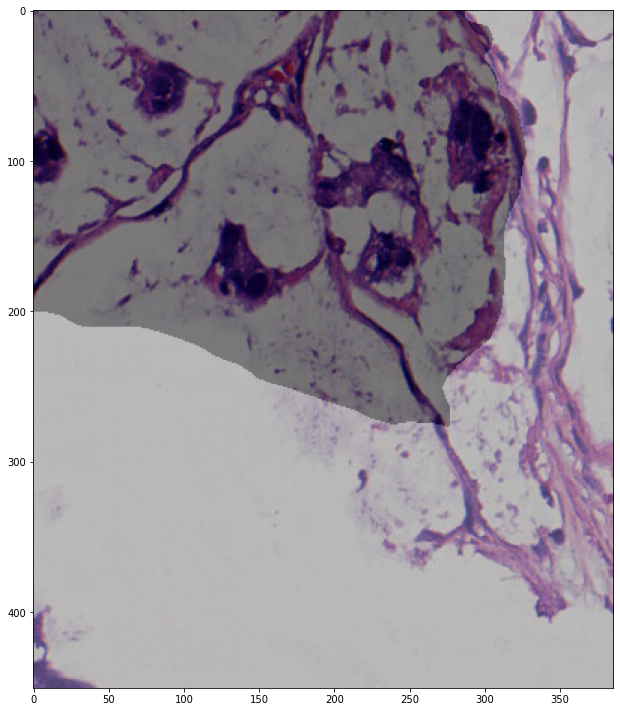

In [ ]:
img = mmcv.imread('train/train_org_image/0DqBXloK.png')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)